<a href="https://colab.research.google.com/github/samanehPahlavani/MscFraudDetection/blob/main/EthereumPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Loading **

In [4]:
import sys
try:
  import google.colab
  !{sys.executable} -m pip -q -q install pandas>=0.24.2
  !{sys.executable} -m pip -q -q install matplotlib>=3.0.3
  !{sys.executable} -m pip -q -q install seaborn>=0.9.1
  !{sys.executable} -m pip -q -q install numpy>=1.18.5
  !{sys.executable} -m pip -q -q install scikit-learn>=0.22.2
  !{sys.executable} -m pip -q -q install pycm>=2.2
except:
  pass


**Read DAtaset1**

In [8]:

import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from pycm import ConfusionMatrix, Compare

FOLD_NUMBER = 10
RANDOM_STATE = 23
METRIC_LIST = ["Accuracy", "F1", "Kappa", "Precision", "Recall"]
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = pd.read_csv(os.path.join("/content/drive/MyDrive/EtherFirstDataSet/", "1.csv"))

 ### **FeatureSelection**

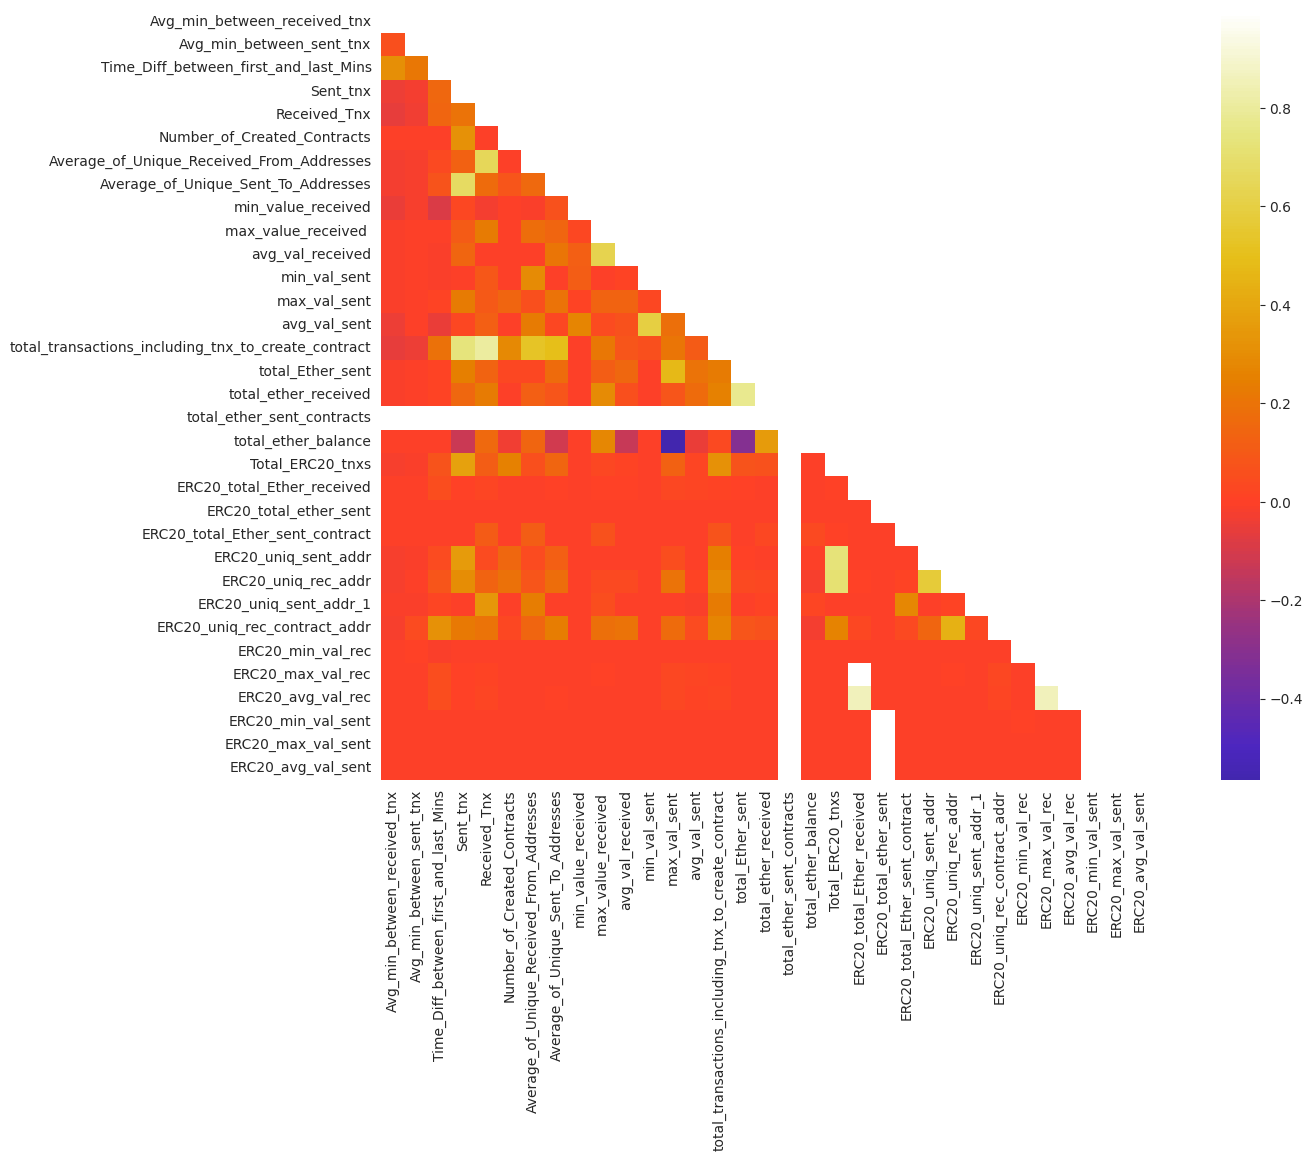

In [9]:
corr = df.iloc[:,2:-4].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)




1.      total_ether_sent_contracts is completly unused

2.  ERC20_min_val_sent, ERC20_max_val_sent, ERC20_avg_val_sent and ERC20_total_ether_sent have high correlation so we can remove 3 of them

3. ERC20_max_val_rec and ERC20_total_Ether_reveived have a high correlation so we can remove one of them





    

    



In [10]:
df.drop(["total_ether_sent_contracts", "ERC20_min_val_sent", "ERC20_max_val_sent", "ERC20_avg_val_sent", "ERC20_max_val_rec"], axis=1, inplace=True)


This dataset is imbalanced so we sample negative cases randomly to create a new balanced dataset.


In [11]:
positive_sample = df[df["FLAG"] == 1]
negative_sample = df[df["FLAG"] == 0].sample(len(positive_sample), random_state = RANDOM_STATE)
data = pd.concat([negative_sample, positive_sample], axis = 0)
y = data["FLAG"]
X = data.iloc[:,2:-4]



We replace NaN with average.


In [12]:

for col in X.columns:
    X[col] = X[col].fillna(X[col].mean())



Preprocessing

We will use StandardScaler to standardize features by removing the mean and scaling to unit variance.


**Read DAtaset2**

In [19]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = pd.read_csv(os.path.join("/content/drive/MyDrive/EtherFirstDataSet/", "2.csv"))

**Feature Selection**

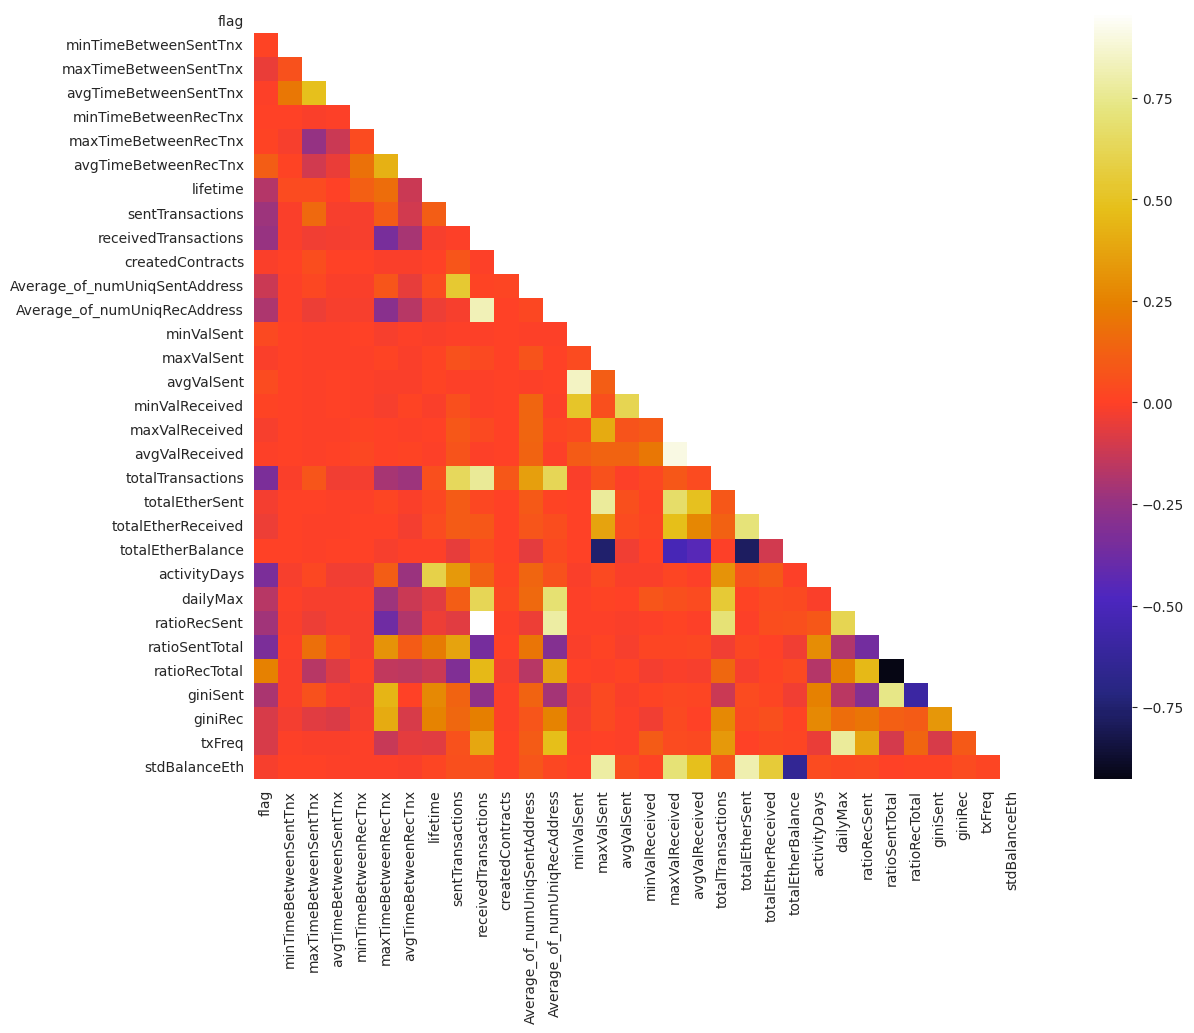

In [20]:
corr = df.iloc[:,1:].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)


1.  ratioRecSent, receivedTransactions have high correlation so we can remove one of them



In [21]:

df.drop(["ratioRecSent"], axis=1, inplace=True)



This dataset is imbalanced so we sample negative cases randomly to create a new balanced dataset.


In [23]:
positive_sample = df[df["flag"] == 1]
negative_sample = df[df["flag"] == 0].sample(len(positive_sample), random_state = RANDOM_STATE)
data = pd.concat([negative_sample, positive_sample], axis = 0)
y = data["flag"]
X = data.iloc[:,2:]



We replace NaN with average.


In [24]:


for col in X.columns:
    X[col] = X[col].fillna(X[col].mean())




Preprocessing

We will use StandardScaler to standardize features by removing the mean and scaling to unit variance.


**Read DAtaset Merged**

In [25]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = pd.read_csv(os.path.join("/content/drive/MyDrive/EtherFirstDataSet/", "3.csv"))

**Feature Selection**

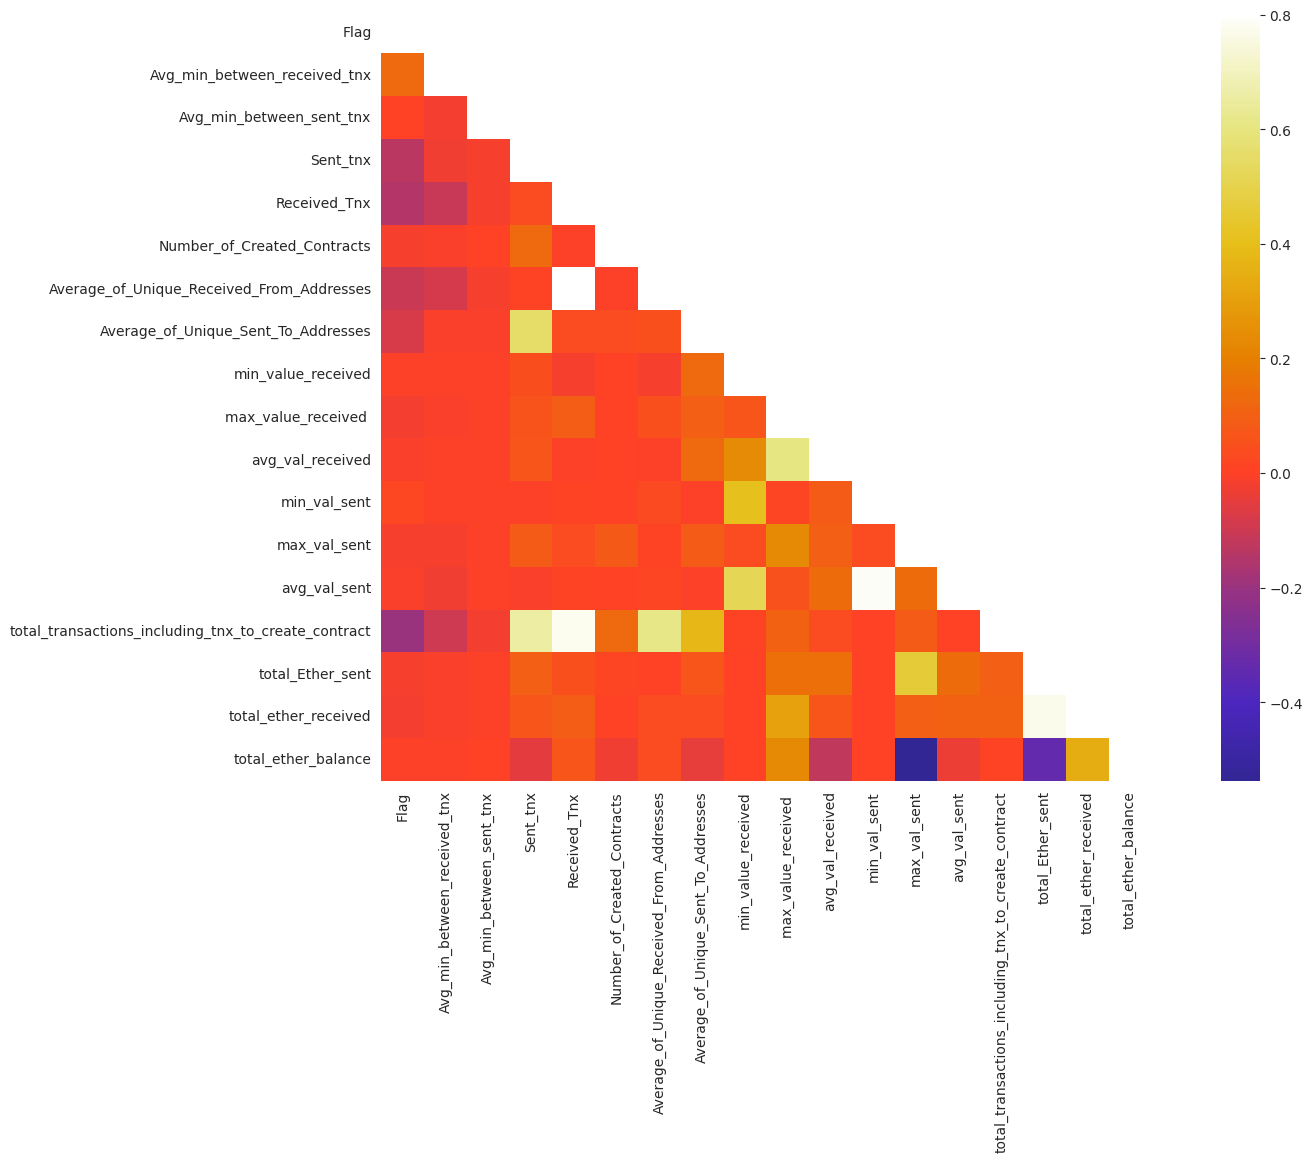

In [26]:
corr = df.iloc[:,1:].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)




We can use all the features

This dataset is imbalanced so we sample negative cases randomly to create a new balanced dataset.


In [27]:

positive_sample = df[df["Flag"] == 1]
negative_sample = df[df["Flag"] == 0].sample(len(positive_sample), random_state = RANDOM_STATE)
data = pd.concat([negative_sample, positive_sample], axis = 0)
y = data["Flag"]
X = data.iloc[:,2:]




We replace NaN with average.


In [28]:

for col in X.columns:
    X[col] = X[col].fillna(X[col].mean())



Preprocessing

We will use StandardScaler to standardize features by removing the mean and scaling to unit variance.
